In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, precision_score, precision_recall_curve, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.evaluate import bias_variance_decomp
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv("heart_disease.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

   - We have considered 918 patients record in our dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


- There are total 12 features in the dataset.


1. Age: The person's age in years


2. Sex: The person's sex (M-> Male, F-> Female)


3. ChestPainType: The chest pain experienced. There are 4 types.
    - TA: Typical Angina
    - ATA: ATypical Angina
    - NAP: Non- Anginal Pain
    - ASY: Asymptomatic


4. RestingBP: The person's resting blood pressure (in mm Hg)


5. Cholesterol: The person's cholesterol measurement in mg/dl


6. FastingBS: The person's fasting blood sugar (> 120 mg/dl => 1 = true; 0 = false)


7. RestingECG: Resting electrocardiographic measurement (Normal, ST, LVH )


8. MaxHR: The person's maximum heart rate achieved


9. ExerciseAngina: Exercise induced angina (Y, N)


10. oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)


11. ST_Slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)


12. HeartDisease(target variable): Whether a person has a heart disease or not (0 = No heart disease, 1= has a heart disease)

In [6]:
# Seperating the categorical and continuous variables
categorical = []
continuos = []
for cols in df.columns:
    if len(df[cols].unique()) < 10:
        categorical.append(cols)
    else:
        continuos.append(cols)

## Exploratory Data Analysis (EDA)

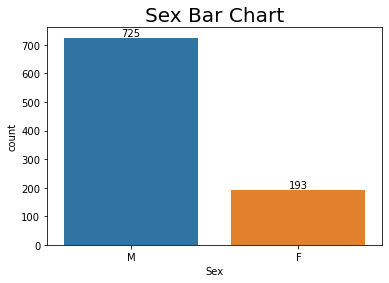

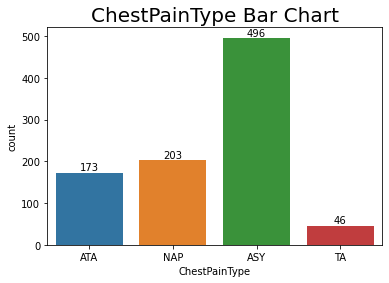

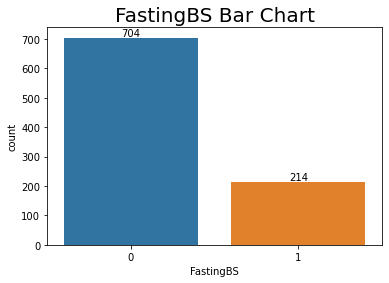

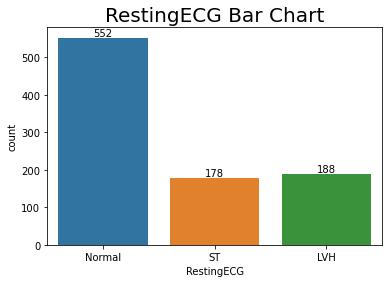

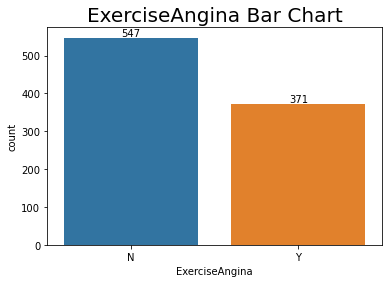

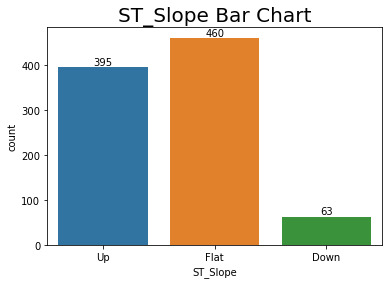

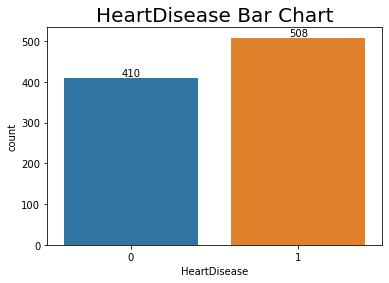

In [7]:
for col in categorical:
    ax = sns.countplot(x=col, data=df)
    for i in ax.containers:
        plt.title("{} Bar Chart".format(col),fontsize=20)
        ax.bar_label(i,)
    plt.show()

- Under our analysis, we found that 508 people are suffering from heart disease, and 410 are healthy.

- There are 725 Males and 193 Females in the dataset considered. 

- The proportion of infected men is greater than that of females.

- We observe that those who have chest pain of type ASY is more likely to affected by heart disease.

- People having blood sugar are more likely to have heart disease.

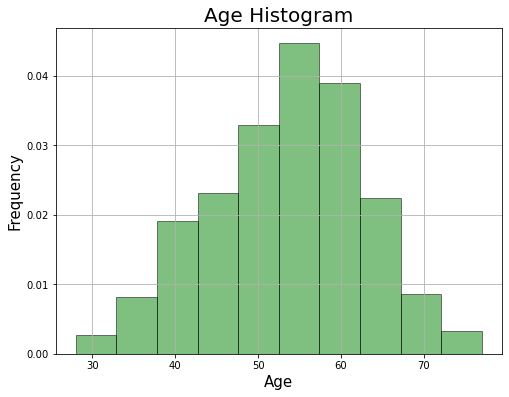

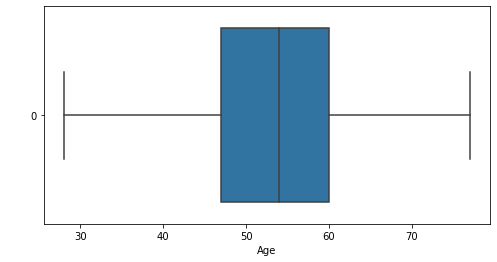

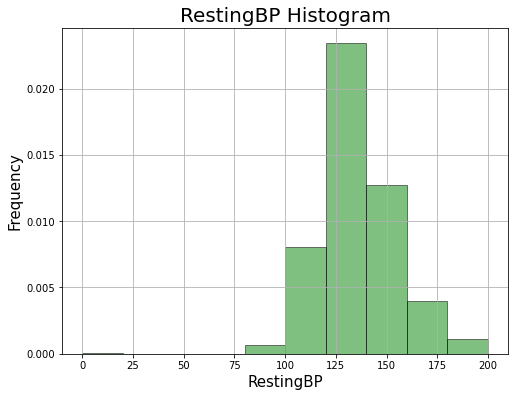

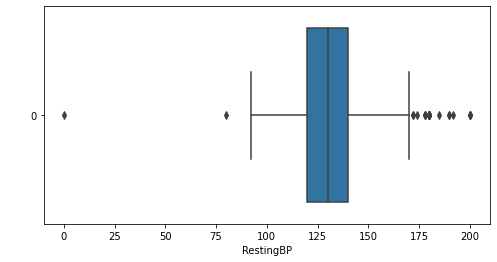

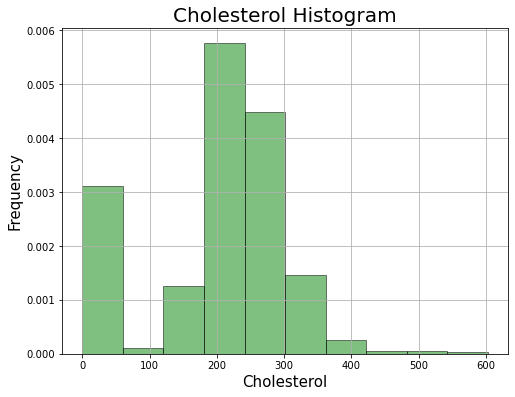

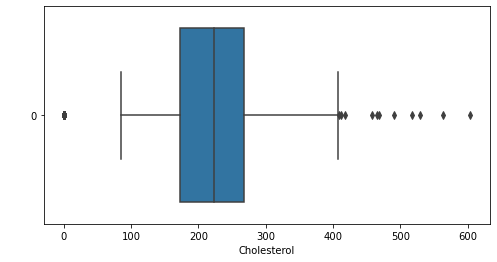

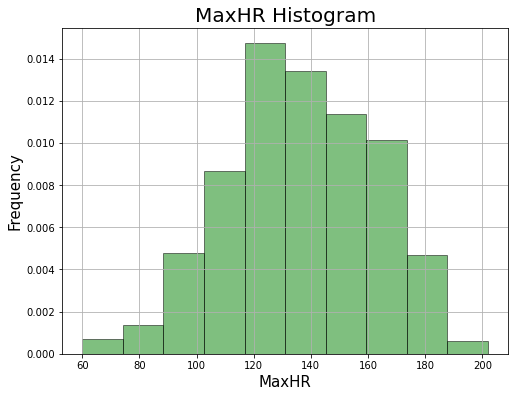

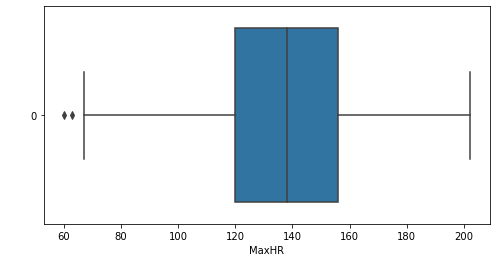

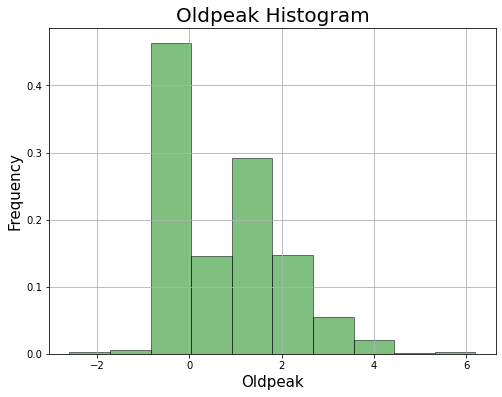

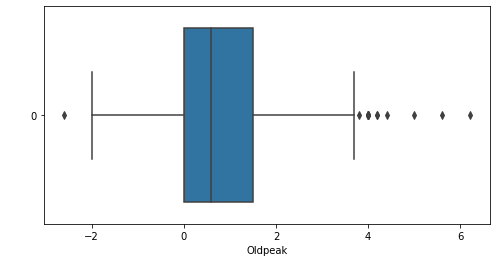

In [8]:
# plotting histogram and boxplot for each numerical variable
for i in continuos:
    plt.subplot(1,1,1) #(row, column, plot)
    df['%s'%i].plot(kind='hist',alpha=0.5, figsize=(8,6), color="Green",grid=True,edgecolor='black',density = True)
    plt.xlabel('%s'%i,fontsize=15)
    plt.ylabel("Frequency",fontsize=15)
    plt.title("{} Histogram".format(i),fontsize=20)
    plt.show()
    
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 1, 1)
    sns.boxplot(data=df[i],orient='h')
    plt.xlabel(i)
    plt.ylabel(' ',fontsize=20)
    plt.show()

- People with age ranging from 47 to 62 are more likely to have heart disease.
- Resting blood pressure anything above 125-141 is generally of concern.
- People with a maximum of heart rate over 125 are more likely to have heart disease.
- We also observe that there are outliers in RestingBP and Cholestrol which are of concern. We will further investigate these outliers.

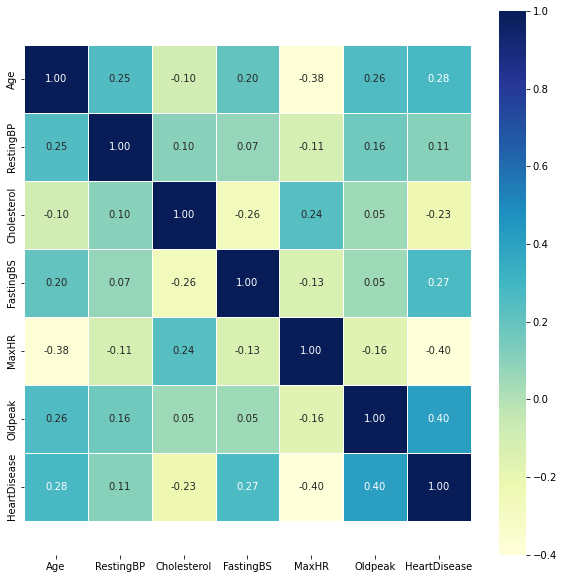

In [9]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

- There are different types of correlation between the columns as positive and negative correlation, also there are no correlation between some columns.

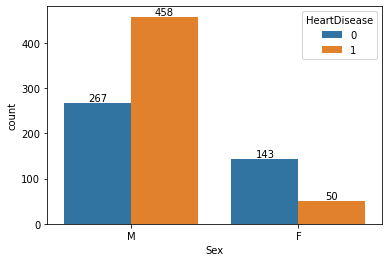

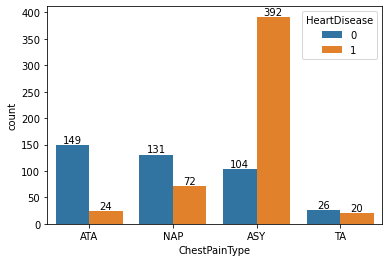

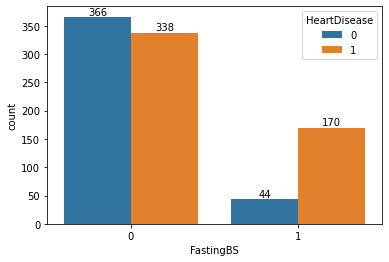

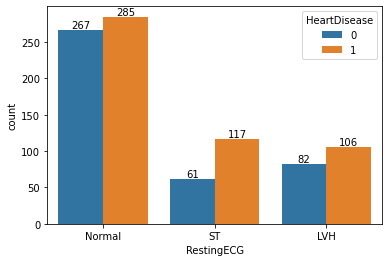

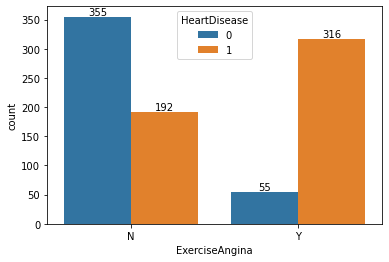

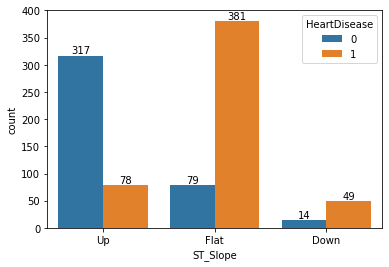

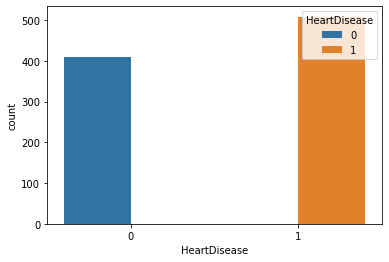

In [10]:
for col in categorical:
    ax = sns.countplot(x=col, hue= 'HeartDisease', data = df)
    if col != 'HeartDisease':
        for i in ax.containers:
            ax.bar_label(i,)
    plt.show()

- The proportion of infected male is greater than that of female
- We observe that those who have chest pain of type ASY is more likely to be affected by heart disease.
- People having blood sugar level are more likely to have heart disease.
- People having Exercise Angina are more likely to get heart disease.
- We also observe that people with ST Slope Flat are in more risk of getting a heart disease.

### Data Processing

There is one observation in the data where RestingBP is zero and Cholestrol is also zero. This can not happen. So we drop this observation.

In [11]:
df[df.RestingBP==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [12]:
df = df.drop(df[df['RestingBP'] == 0 ].index)

In the univariate analysis we have observed that there were many outliers in the Cholestrol in the column. 
The cholestrol level can not be less than 40. So we impute these observations with the mean value.

In [13]:
df[df.Cholesterol<40]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [14]:
mean_cholestrol = np.mean(df.Cholesterol)
mean_cholestrol

199.0163576881134

In [15]:
df['Cholesterol'][df.Cholesterol<40] = round(mean_cholestrol)

In [16]:
categorical.remove('HeartDisease')

In [17]:
# Converting categorical variables to dummies
dfs = pd.get_dummies(df, columns=categorical)

In [18]:
dfs.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
1,49,160,180,156,1.0,1,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,98,0.0,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
3,48,138,214,108,1.5,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
4,54,150,195,122,0.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1


In [19]:
# Standardising

In [20]:
sc = StandardScaler()
dfs[continuos] = sc.fit_transform(dfs[continuos])

In [21]:
dfs.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.432206,0.414627,0.940783,1.383339,-0.831502,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
1,-0.478057,1.526360,-0.998624,0.754736,0.106251,1,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
2,-1.750256,-0.141240,0.834027,-1.523953,-0.831502,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
3,-0.584074,0.303453,-0.393671,-1.131075,0.575128,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
4,0.052026,0.970493,-0.731733,-0.581047,-0.831502,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1


In [22]:
def performance_evaluation(y , y_pred):
    print("Accuracy score of test data:", np.round(accuracy_score(y, y_pred)*100, 2))
    print("Recall score of test data:  ", np.round(recall_score(y, y_pred)*100, 2))
    print("Precision score of test data: ", np.round(precision_score(y, y_pred)*100, 2))
    print("F1 score of test data:      ", np.round(f1_score(y, y_pred)*100, 2))

In [23]:
def performance_graph(d, f):
    
    plt.figure(figsize=(10,6))
    plt.plot(d,f,color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('F1 Score vs. K Value')
    plt.xlabel('K')
    plt.ylabel('F1 Score')
    plt.show()

In [24]:
X = dfs.drop('HeartDisease', axis = 1)
y = dfs.HeartDisease

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3)

###  KNN 

In [26]:
from sklearn.model_selection import cross_validate, StratifiedKFold

knn = KNeighborsClassifier(n_neighbors= 1, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
performance_evaluation(y_test, y_pred)

Accuracy score of test data: 83.7
Recall score of test data:   87.5
Precision score of test data:  80.21
F1 score of test data:       83.7


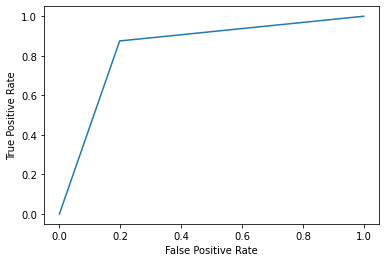

In [27]:
fpr, tpr, _ = roc_curve(y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

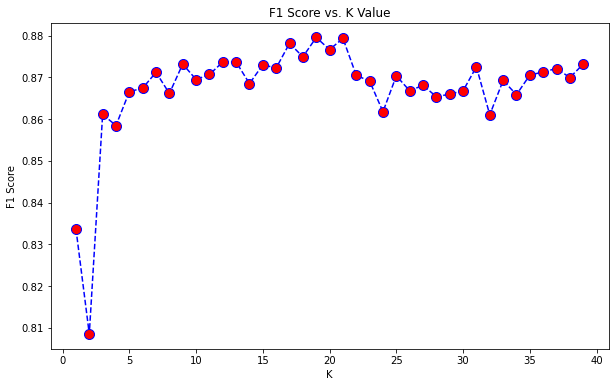

In [28]:
depth = np.arange(1,40)
mean_f1 = []

for k in depth:
    knn_model = KNeighborsClassifier(n_neighbors= k, metric='euclidean')
    knn = cross_validate(estimator=knn_model, X=X_train,  y=y_train, cv=5, scoring='f1')
    mean_f1.append(np.mean(knn['test_score']))
    #print(np.round(np.var(knn['test_score']),4))

performance_graph(depth, mean_f1)   

In [29]:
# Test
k = 7
knn = KNeighborsClassifier(n_neighbors= k, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
performance_evaluation(y_test, y_pred)

Accuracy score of test data: 88.04
Recall score of test data:   90.91
Precision score of test data:  85.11
F1 score of test data:       87.91


###  Decision Tree

In [30]:
df = pd.read_csv("heart_disease.csv")

In [31]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [32]:
df = pd.get_dummies(df, columns=categorical)

In [33]:
X = df.drop('HeartDisease', axis = 1)
y = df.HeartDisease

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3)

## Pre- Pruning

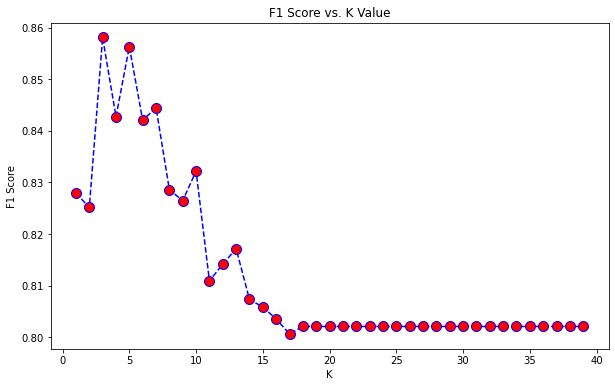

In [35]:
depth = np.arange(1,40)
mean_f1 = []
for k in depth:
    dtm = DecisionTreeClassifier(max_depth=k, criterion='gini', random_state=3)
    dtr = cross_validate(estimator=dtm, X=X_train,  y=y_train, cv=5, scoring='f1')
    mean_f1.append(np.mean(dtr['test_score']))
    
performance_graph(depth, mean_f1)

Fitting a Decision Tree with max_depth = 3

Accuracy score of test data: 88.04
Recall score of test data:   91.84
Precision score of test data:  86.54
F1 score of test data:       89.11


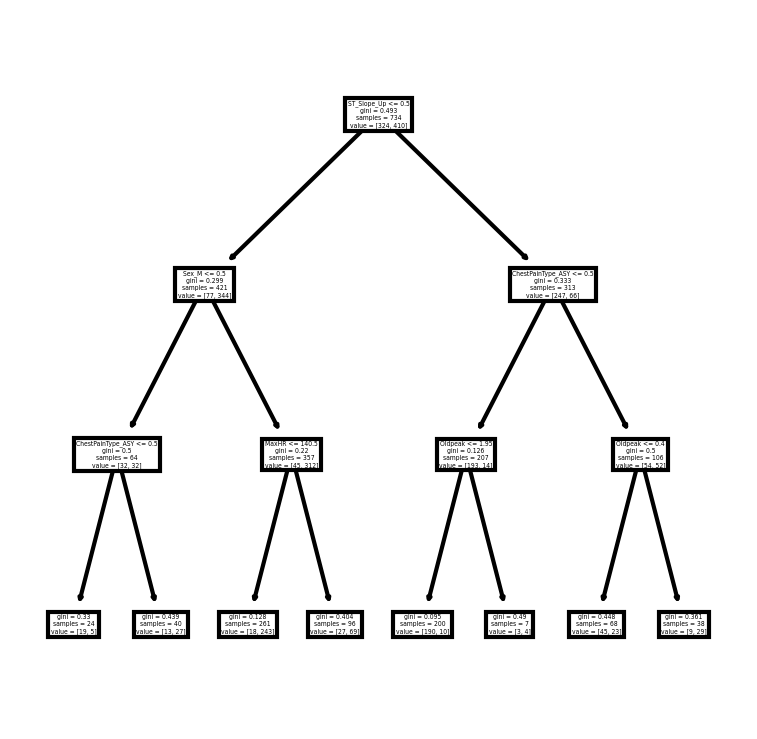

In [36]:
dec_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, criterion='gini')
dec_tree.fit(X_train, y_train)
y_pred = dec_tree.predict(X_test)

performance_evaluation(y_test, y_pred)

fig, axes = plt.subplots(figsize=(3,3), dpi=300)
tree.plot_tree(dec_tree, feature_names=list(X), filled=False)
plt.show()

## Post- Pruning

In [37]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

In [38]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [39]:
train_f1, test_f1 = [], []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_f1.append(f1_score(y_train_pred, y_train))
    test_f1.append(f1_score(y_test_pred, y_test))

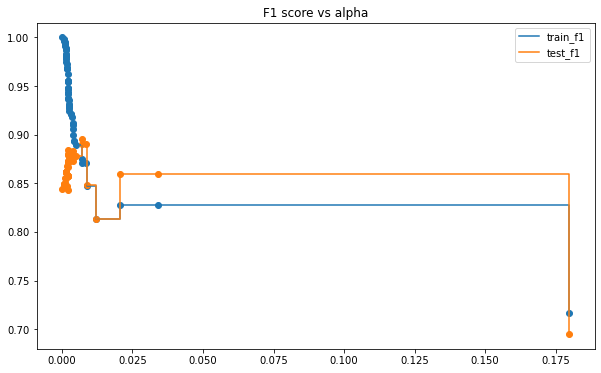

In [40]:
plt.figure(figsize=(10,6))

plt.scatter(ccp_alphas,train_f1)
plt.scatter(ccp_alphas,test_f1)
plt.plot(ccp_alphas,train_f1,label='train_f1',drawstyle="steps-post")
plt.plot(ccp_alphas,test_f1,label='test_f1',drawstyle="steps-post")
plt.legend()
plt.title('F1 score vs alpha')
plt.show()

Accuracy score of test data: 88.04
Recall score of test data:   91.84
Precision score of test data:  86.54
F1 score of test data:       89.11


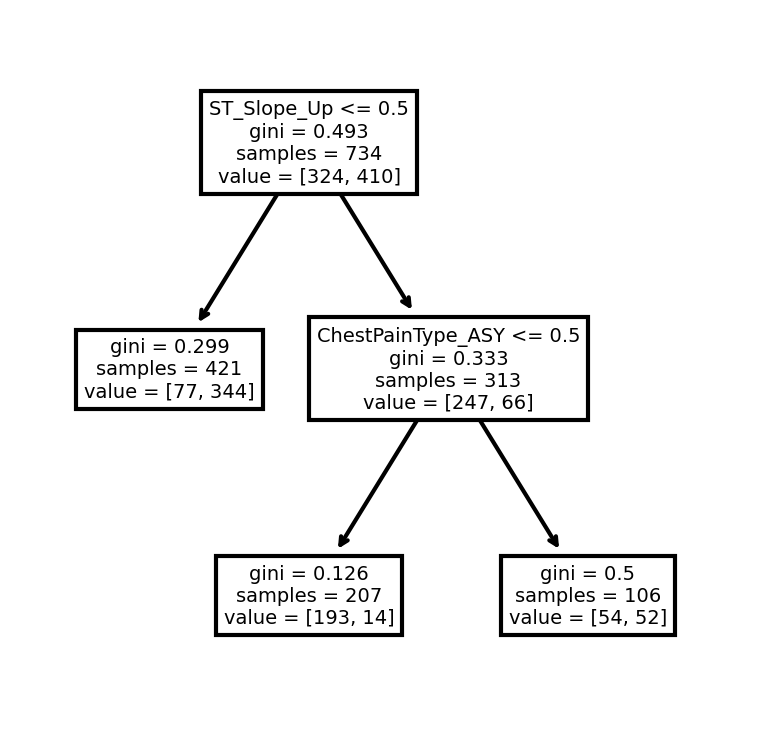

In [41]:
alpha = 0.021
clf = DecisionTreeClassifier(random_state=0,ccp_alpha=alpha)
clf.fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

performance_evaluation(y_test, y_pred)

fig, axes = plt.subplots(figsize=(3,3), dpi=300)
tree.plot_tree(clf, feature_names=list(X), filled=False)
plt.show()

## Conclusion

    Models                         |                Accuracy Score               |              F1 Score
    1. 7-NN                        |                   88.04                     |                87.91
    2. Decision Tree               |                   88.04                     |                89.11

    Comparing both the models, Decision Tree is performing well.
    In Decision Tree, Post- Pruning and Pre- Pruning models are giving almost the same F1 score. But, post- pruned tree  is preferred because of its low complexity.